# Evaluate the value of Real Estate

Import all libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import seaborn as sns
from matplotlib import pyplot



In [2]:
# Create connection.
cnx = sqlite3.connect('database.db')
df = pd.read_sql_query("SELECT * FROM Listings", cnx)

## Assessment

looking on the data structure 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head()

,user_id,id,uri,title,price,content,imgs,refresh,category,beds,livings,wc,area,type,street_width,age,last_update,street_direction,ketchen,ac,furnished,location.lat,location.lng,path,user.review,user.img,user.name,user.phone,user.iam_verified,user.rega_id,native.logo,native.title,native.image,native.description,native.external_url,rent_period,city,city_id,district,district_id,width,length,advertiser_type,create_time,has_extended_details,daily_rentable,createdAt,updatedAt
0,10065,4331,شارع-الياقوت-الدار-البيضاء-الرياض,"أرض للبيع في شارع الياقوت, الدار البيضاء, الرياض",1958400.0,تجاريه ش ياقوت ٦٠ مساحه ٨١٦ تقريبا,"[""000000000_1627687178830.jpg""]",1672495809,2,0.0,0.0,0.0,816.0,2.0,60.0,0.0,1672495824,4.0,0.0,0.0,0.0,24.548930,46.781390,/أراضي-للبيع/الرياض/جنوب-الرياض/حي-الدار-البيضاء/شارع-الياقوت-الدار-البيضاء-الرياض,3.83,,ابو زايد,0,1.0,2295425,None,None,None,None,None,0.0,الرياض,21,حي الدار البيضاء,424,25.0,32.0,None,1415294130,NaN,0.0,2023-01-01 14:13:28.553 +00:00,2023-01-01 14:13:28.553 +00:00
1,11005,4837,طريق-الملك-عبدالله-بن-عبدالعزيز-الفرعي-المغرزات-الرياض,"أرض للبيع في طريق الملك عبدالله بن عبدالعزيز الفرعي, المغرزات, الرياض",15078000.0,الارض على طريق الملك عبدالله على شارعين مظاهره ٨٠ و ١٥\nالاطوال\n٢٥* ٤٣.١ عمق,"[""000000000_1627687181813.jpg""]",1672040788,2,0.0,0.0,0.0,1077.0,2.0,80.0,0.0,1672040803,4.0,0.0,0.0,0.0,24.754130,46.724820,/أراضي-للبيع/الرياض/شمال-الرياض/حي-المغرزات/طريق-الملك-عبدالله-بن-عبدالعزيز-الفرعي-المغرزات-الرياض,4.56,551515516_1501071840092.jpg,مؤسسة بيت الأثرياء للعقارات,0,1.0,None,None,None,None,None,None,0.0,الرياض,21,حي المغرزات,566,NaN,NaN,None,1416054461,NaN,0.0,2023-01-01 14:52:38.169 +00:00,2023-01-01 14:52:38.169 +00:00
2,8017,5498,5-المملكة-العربية-السعودية-5498,أرض للبيع في 5 المملكة العربية السعودية,8057700.0,الارض استثماريه في محافظة البرك طريق جده جازان \nجنوب الارض شاليهات البحر مطل ع الارض مباشرة بعد الطريق بصك مميز سكني\nوشرق الارض ارض اخرا املكها متصله بها\nابومهند\nج/0506610555,"[""506610555_1417214243205.jpg"",""506610555_1417214243875.jpg"",""506610555_1417214244521.jpg""]",1671819056,2,0.0,0.0,0.0,23022.0,3.0,15.0,0.0,1671819056,3.0,0.0,0.0,0.0,18.268720,41.516460,/أراضي-للبيع/محايل/حي-الروضة/5-المملكة-العربية-السعودية-5498,NaN,506610555_1570358699065.jpg,راكان الشاعري,0,1.0,None,None,None,None,None,None,0.0,محايل,92,حي الروضة,4100,NaN,NaN,None,1417220044,NaN,0.0,2023-01-01 15:01:52.351 +00:00,2023-01-01 15:01:52.351 +00:00
3,13810,6520,شارع-Saher-Al-Garbee-St-ذهبان,"أرض للإيجار في شارع الهزاعية, حي العشيرية, جدة",50000.0,السلام عليكم ورحمة الله وبركاته\nوكل عام وانتم بخير \nاسعد الله اوقاتكم بكل خير\nمساحة الارض 400م\nعلى شارع 32\nطريق المدينة وقبل كوبري ذهبان بجانب منتزة الساحل الغربي\nالارض بصك شرعي \nمخطط 606/ت\nحي ضاحية الفردوس\nرقم القطعة 247\n\nللتواصل واتس اب ابو رعد \n\nhttps://wa.me/966504121665\n\nالارض للايجار بعقد سنوي,"[""504121665_1418232181483.jpg"",""504121665_1418232181636.jpg"",""504121665_1418232181750.jpg"",""504121665_1418232181859.jpg"",""504121665_1418232181968.jpg""]",1672190424,15,0.0,0.0,0.0,400.0,3.0,35.0,0.0,1672190424,4.0,0.0,0.0,0.0,21.892200,39.126540,/أراضي-للإيجار/جدة/شمال-جدة/حي-الرياض/شارع-Saher-Al-Garbee-St-ذهبان,4.43,504121665_1614727198836.jpg,عصام آل جمعان,0,1.0,5907435,None,None,None,None,None,0.0,جدة,66,حي الرياض,3490,20.0,20.0,None,1418232587,NaN,0.0,2023-01-01 14:43:23.326 +00:00,2023-01-01 14:43:23.326 +00:00
4,5234,8847,طريق-الملك-خالد-حي-الثقبة-الخبر-الخبر-8847,أرض للبيع في طريق الملك خالد ، حي الثقبة ، الخبر ، الخبر,3000000.0,ارض للبيع لبناء شقق فندقيه او عمارات سكنيه خلف فينيسيا مول قريب الراشد وشارع الملك عبدالله والملك خالد موقع مميز ورائع \n0555882246\n0567772202,"[""567772202_1632148243568.png"",""000052346_1661453484842.jpg""]",1672253180,2,0.0,0.0,0.0,870.0,3.0,15.0,0.0,1672253180,7.0,0.0,0.0,0.0,26.285235,50.180363,/أراضي-للبيع/الخبر/حي-الثقبة/طريق-الملك-خالد-حي-الثقبة-الخبر-الخبر-8847,4.76,1621763009232.jpg,أساس الخليجيه العقاريه 922293,0,1.0,922293,None,None,None,None,None,0.0,الخبر,12,حي الثقبة,1060,NaN,NaN,None,14

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438535 entries, 0 to 438534
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               438535 non-null  int64  
 1   id                    438535 non-null  int64  
 2   uri                   438535 non-null  object 
 3   title                 438521 non-null  object 
 4   price                 438535 non-null  float64
 5   content               438351 non-null  object 
 6   imgs                  438535 non-null  object 
 7   refresh               438535 non-null  int64  
 8   category              438535 non-null  int64  
 9   beds                  267377 non-null  float64
 10  livings               267828 non-null  float64
 11  wc                    266841 non-null  float64
 12  area                  438094 non-null  float64
 13  type                  112245 non-null  float64
 14  street_width          430020 non-null  float64
 15  

In [5]:
#see if there is any duplicate in the data
df.duplicated().sum()

0

In [6]:
#look how many null
df.isnull().sum()

user_id                      0
id                           0
uri                          0
title                       14
price                        0
content                    184
imgs                         0
refresh                      0
category                     0
beds                    171158
livings                 170707
wc                      171694
area                       441
type                    326290
street_width              8515
age                     168307
last_update                  0
street_direction         49487
ketchen                 185370
ac                      382034
furnished               161586
location.lat                 0
location.lng                 0
path                         0
user.review              68044
user.img                137212
user.name                 4065
user.phone                   0
user.iam_verified         2047
user.rega_id            216072
native.logo             438534
native.title            438534
native.i

In [7]:
df.columns

Index(['user_id', 'id', 'uri', 'title', 'price', 'content', 'imgs', 'refresh',
       'category', 'beds', 'livings', 'wc', 'area', 'type', 'street_width',
       'age', 'last_update', 'street_direction', 'ketchen', 'ac', 'furnished',
       'location.lat', 'location.lng', 'path', 'user.review', 'user.img',
       'user.name', 'user.phone', 'user.iam_verified', 'user.rega_id',
       'native.logo', 'native.title', 'native.image', 'native.description',
       'native.external_url', 'rent_period', 'city', 'city_id', 'district',
       'district_id', 'width', 'length', 'advertiser_type', 'create_time',
       'has_extended_details', 'daily_rentable', 'createdAt', 'updatedAt'],
      dtype='object')

category column shows the type of real estate
* 1= Apartment, rental 
* 2= Land, sell 
* 3= Villa, sell
* 4= Floor, rental
* 5= Villa, rental 
* 6= Apartment, sell 
* 7= Building, sell 
* 8= Store, rental
* 9= House, sell 
* 10= Esterahah, sell 
* 11= House, rental
* 12= Farm, sell 
* 13= Esterahah, rental 
* 14= Office, rental
* 15= Land, rental 
* 16= Building, rental 
* 17= Warehouse, rental 
* 18= Campsite, rental 
* 19= Room, rental
* 20= Store, sell 
* 21= Furnished apartment
* 22= Floor, sell 
* 23= Chalet, rental

### Quality issues
> * (beds,livings,wc,area,ketchen,street_width,width,length,age) columns need to convert to int type. 
> * unclear columns name.
> * Category types (2,3,6,9,22) which (2) for the land mpdel (3,6,9,22) for the houses model

### Tidiness
> * Split the data into two dataframe one of them for Land model and other one for houses model.
> * creat new column for classify real estate if (تجاري،سكني، تجاري سكني).
> * The features need in the house model are (id, price, category,beds, livings, wc, area, street_width, age, ketchen, city, city_id, district, district_id).
> *  The features need in the land model are (id, price, street_width, city, city_id, district, district_id,area).

## Cleaning data

First take the category that need it in the project  

In [8]:
df =df[(df['category']== 3) | (df['category']== 6) | (df['category']== 9) | (df['category']==22)|(df['category']==2)]

rename the columns and take the colums that need it on the project  

In [9]:
new_name = {'beds':'bedroom','livings':'livingـroom','wc':'bathroom',
            'district':'neighborhood','district_id':'neighborhood_id'}
df.rename(columns = new_name,inplace = True)

In [10]:
df.columns

Index(['user_id', 'id', 'uri', 'title', 'price', 'content', 'imgs', 'refresh',
       'category', 'bedroom', 'livingـroom', 'bathroom', 'area', 'type',
       'street_width', 'age', 'last_update', 'street_direction', 'ketchen',
       'ac', 'furnished', 'location.lat', 'location.lng', 'path',
       'user.review', 'user.img', 'user.name', 'user.phone',
       'user.iam_verified', 'user.rega_id', 'native.logo', 'native.title',
       'native.image', 'native.description', 'native.external_url',
       'rent_period', 'city', 'city_id', 'neighborhood', 'neighborhood_id',
       'width', 'length', 'advertiser_type', 'create_time',
       'has_extended_details', 'daily_rentable', 'createdAt', 'updatedAt'],
      dtype='object')

In [11]:
df = df[['id','content','category','bedroom','livingـroom','bathroom','ketchen','area','street_width','age','city', 'city_id', 'neighborhood', 'neighborhood_id','price']]

Drop the Nan rows that in the content column

In [12]:
df.dropna(subset=['content'],inplace= True)

Add new column for real estate classify

In [13]:
df['Classification'] = 'غير مصنف'


Class_0 = ((df.content.str.contains('سكني'))|(df.content.str.contains('سكنية')))
Class_1 = ((df.content.str.contains('تجاري'))|(df.content.str.contains('تجارية')))
Class_2 = ((df.content.str.contains('زراعي')) | (df.content.str.contains('زراعية')))

df.loc[(~Class_0)& (Class_1) &(~Class_2), 'Classification']='تجاري'
df.loc[((Class_0)& (~Class_1) &(~Class_2)|(~Class_0)& (~Class_1) &(~Class_2)), 'Classification']='سكني'
df.loc[(~Class_0)& (~Class_1) &(Class_2), 'Classification']='زراعي'
df.loc[(Class_0)& (Class_1) &(~Class_2), 'Classification']='تجاري سكني '

In [14]:
df.groupby('Classification').id.count()

Classification
تجاري           19707
تجاري سكني       7831
زراعي            1622
سكني           308666
غير مصنف          307
Name: id, dtype: int64

In [15]:
# drop content column because don't need it anymore
df.drop(['content'], axis=1,inplace= True)

(غير مصنف) are few so don't need to keep it.

In [16]:
df = df[~(df['Classification'] == 'غير مصنف')]

In [17]:
df.groupby('Classification').id.count()

Classification
تجاري           19707
تجاري سكني       7831
زراعي            1622
سكني           308666
Name: id, dtype: int64

In [18]:
df.isna().sum()

id                      0
category                0
bedroom            133167
livingـroom        133031
bathroom           133031
ketchen            140138
area                    6
street_width         5605
age                150393
city                    0
city_id                 0
neighborhood            0
neighborhood_id         0
price                   0
Classification          0
dtype: int64

In [19]:
df=df.fillna(df[['bedroom','ketchen','age','street_width','area','livingـroom','bathroom']].mean().round())

In [20]:
df[['bedroom','ketchen','age','street_width','area','livingـroom','bathroom']]=df[['bedroom','ketchen','age','street_width','area','livingـroom','bathroom']].astype('int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337826 entries, 0 to 438534
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               337826 non-null  int64  
 1   category         337826 non-null  int64  
 2   bedroom          337826 non-null  int64  
 3   livingـroom      337826 non-null  int64  
 4   bathroom         337826 non-null  int64  
 5   ketchen          337826 non-null  int64  
 6   area             337826 non-null  int64  
 7   street_width     337826 non-null  int64  
 8   age              337826 non-null  int64  
 9   city             337826 non-null  object 
 10  city_id          337826 non-null  int64  
 11  neighborhood     337826 non-null  object 
 12  neighborhood_id  337826 non-null  int64  
 13  price            337826 non-null  float64
 14  Classification   337826 non-null  object 
dtypes: float64(1), int64(11), object(3)
memory usage: 41.2+ MB


Well new we can split the datafram

In [22]:
#split datafram
house_df = df[~(df['category']==2)]
land_df = df[df['category']==2]
land_df = land_df[['id','category','area','street_width','city', 'city_id', 'neighborhood', 'neighborhood_id','Classification','price']]

In [23]:
house_df.head()

,id,category,bedroom,livingـroom,bathroom,ketchen,area,street_width,age,city,city_id,neighborhood,neighborhood_id,price,Classification
7,14155,3,5,3,5,1,810,15,0,جدة,66,حي النهضة,3608,7300000.0,سكني
11,24578,3,5,1,3,1,400,30,0,مكة المكرمة,94,حي الملك فهد,3766,1650000.0,سكني
24,69806,6,5,1,3,1,210,30,0,الدمام,18,حي النور,1306,470000.0,سكني
41,93178,6,3,1,4,1,240,5,0,مدينة الملك عبدالله الاقتصادية,93,حي البيلسان,3670,2500000.0,سكني
53,122930,3,5,4,5,1,203,12,18,الطائف,26,حي الخالدية,3320,1200000.0,سكني


In [24]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203774 entries, 7 to 438532
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               203774 non-null  int64  
 1   category         203774 non-null  int64  
 2   bedroom          203774 non-null  int64  
 3   livingـroom      203774 non-null  int64  
 4   bathroom         203774 non-null  int64  
 5   ketchen          203774 non-null  int64  
 6   area             203774 non-null  int64  
 7   street_width     203774 non-null  int64  
 8   age              203774 non-null  int64  
 9   city             203774 non-null  object 
 10  city_id          203774 non-null  int64  
 11  neighborhood     203774 non-null  object 
 12  neighborhood_id  203774 non-null  int64  
 13  price            203774 non-null  float64
 14  Classification   203774 non-null  object 
dtypes: float64(1), int64(11), object(3)
memory usage: 24.9+ MB


In [25]:
house_df.groupby(['Classification']).count()

,id,category,bedroom,livingـroom,bathroom,ketchen,area,street_width,age,city,city_id,neighborhood,neighborhood_id,price
Classification,,,,,,,,,,,,,,
تجاري,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
تجاري سكني,597,597,597,597,597,597,597,597,597,597,597,597,597,597
زراعي,178,178,178,178,178,178,178,178,178,178,178,178,178,178
سكني,198575,198575,198575,198575,198575,198575,198575,198575,198575,198575,198575,198575,198575,198575


In [26]:
land_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134052 entries, 0 to 438534
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               134052 non-null  int64  
 1   category         134052 non-null  int64  
 2   area             134052 non-null  int64  
 3   street_width     134052 non-null  int64  
 4   city             134052 non-null  object 
 5   city_id          134052 non-null  int64  
 6   neighborhood     134052 non-null  object 
 7   neighborhood_id  134052 non-null  int64  
 8   Classification   134052 non-null  object 
 9   price            134052 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 11.3+ MB


In [27]:
print("Land: ",land_df.shape ,"\nHouse: ", house_df.shape)

Land:  (134052, 10) 
House:  (203774, 15)


### The structure of your dataset:- 

> Land dataset have 134052 rows × 10 columns 
<br>
> House dataset have 203774 rows × 15 columns

### Storing Data

In [28]:
house_df.to_csv('Houses_dataset.csv')
land_df.to_csv('Lands_dataset.csv')

## Analyzing and Visualizing Data

In [29]:
Houses_df=pd.read_csv("Houses_dataset.csv")
Land_df = pd.read_csv('Lands_dataset.csv')


In [30]:
Houses_df.shape

(203774, 16)

In [31]:
Land_df.shape

(134052, 11)

### Univariate Exploration

#### Analyzing Houses price.

In [32]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [33]:
Houses_df.describe()

,Unnamed: 0,id,category,bedroom,livingـroom,bathroom,ketchen,area,street_width,age,city_id,neighborhood_id,price
count,203774.000000,2.037740e+05,203774.000000,203774.000000,203774.000000,203774.000000,203774.000000,203774.000000,203774.000000,203774.000000,203774.000000,203774.000000,2.037740e+05
mean,218399.168530,4.799035e+06,4.526304,4.720219,1.953679,4.184292,0.950234,328.815354,20.150520,2.445965,34.696257,1593.664776,1.702645e+06
std,122677.921932,3.864507e+05,3.456916,1.176626,1.052507,0.965037,0.217461,402.263337,8.142284,6.412321,22.885562,1326.460064,2.321743e+06
min,7.000000,1.415500e+04,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,1.000000e+00
25%,115618.750000,4.652494e+06,3.000000,4.000000,1.000000,3.000000,1.000000,200.000000,15.000000,0.000000,21.000000,588.000000,7.700000e+05
50%,213338.000000,4.902544e+06,3.000000,5.000000,2.000000,5.000000,1.000000,300.000000,20.000000,0.000000,21.000000,698.000000,1.180000e+06
75%,324310.750000,5.059666e+06,6.000000,5.000000,3.000000,5.000000,1.000000,375.000000,21.000000,2.000000,66.000000,3476.000000,1.850000e+06
max,438532.000000,5.202079e+06,22.000000,7.000000,7.000000,5.000000,1.000000,119025.000000,100.000000,36.000000,97.000000,4436.000000,1.000000e+08


In [34]:
Houses_df=remove_outliers(Houses_df,['price'],2)

Working on column: price


In [35]:
Houses_df.describe()

,Unnamed: 0,id,category,bedroom,livingـroom,bathroom,ketchen,area,street_width,age,city_id,neighborhood_id,price
count,199189.000000,1.991890e+05,199189.000000,199189.000000,199189.000000,199189.000000,199189.000000,199189.000000,199189.000000,199189.000000,199189.000000,199189.000000,1.991890e+05
mean,218419.928877,4.799744e+06,4.558038,4.708613,1.930885,4.172098,0.949294,311.127131,20.128245,2.396653,34.900376,1609.333929,1.468487e+06
std,122531.492878,3.844688e+05,3.484239,1.174711,1.033549,0.966860,0.219396,351.718369,8.148128,6.380924,22.997409,1330.318703,1.049787e+06
min,11.000000,2.457800e+04,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,1.000000e+00
25%,115943.000000,4.653804e+06,3.000000,4.000000,1.000000,3.000000,1.000000,200.000000,15.000000,0.000000,21.000000,590.000000,7.600000e+05
50%,213217.000000,4.902350e+06,3.000000,5.000000,2.000000,5.000000,1.000000,288.000000,20.000000,0.000000,21.000000,698.000000,1.150000e+06
75%,324142.000000,5.059483e+06,6.000000,5.000000,3.000000,5.000000,1.000000,360.000000,21.000000,2.000000,66.000000,3478.000000,1.750000e+06
max,438532.000000,5.202079e+06,22.000000,7.000000,7.000000,5.000000,1.000000,119025.000000,100.000000,36.000000,97.000000,4436.000000,6.300000e+06


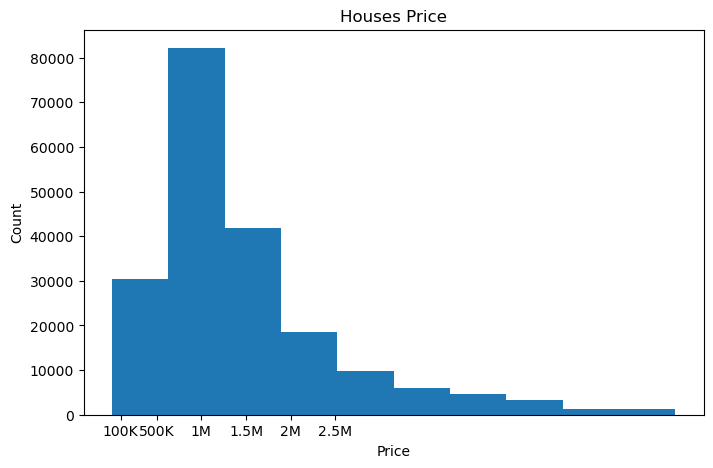

In [36]:
bins = np.arange(Houses_df['price'].min(), 3000000, 100000)
plt.figure(figsize=[8, 5])
plt.hist(data = Houses_df, x = 'price')
plt.xlabel('Price')
plt.xticks([100000,500000, 1000000, 1500000, 2000000,2500000],['100K',"500K",'1M','1.5M','2M','2.5M'])
plt.ylabel('Count');
plt.title('Houses Price')
plt.show()

The mean of houses price in saudi arabia is approximately 1.3M.While, the median of price is 1.18M.Also,the moust of saudis live in villa that have 4 bathrooms and 5 bedrooms. the mean of area real estate almost 330m2.in the last the mean of real estate age equal 2 and half years old. 

<h4>The top 20 house prices in Saudi cities</h4>

In [37]:
groupBycities = pd.DataFrame(Houses_df.groupby(['city'],group_keys=False).price.mean().sort_values(ascending=False)[:20].reset_index())
groupBycities

,city,price
0,الدرعية,3.515879e+06
1,المبرز,3.000000e+06
2,الرياض,1.892136e+06
3,القطيف,1.676932e+06
4,سيهات,1.612458e+06
5,ضبا,1.587500e+06
6,ينبع,1.408765e+06
7,تاروت,1.403056e+06
8,طريف,1.400000e+06
9,صامطة,1.343871e+06


In [38]:
#creat barchart plot
def plot_bar(data, title="", xlabel="", ylabel="", rotation=0,Xaxis = '',oldXaxis= '',xticks = None,yticks=None):

           

    g_bar = data.plot.bar();
    g_bar.figure.set_size_inches(8,5);
    if(Xaxis != ''):
        plt.xticks(oldXaxis,Xaxis)
    if(xticks != None):
        plt.xticks(xticks)
    if(yticks != None):
          plt.yticks(yticks)
    plt.title(title, color = 'black', fontsize = '17')
    plt.xlabel(xlabel, color = 'black', fontsize = '13')
    plt.ylabel(ylabel, color = 'black', fontsize = '13');

In [39]:
def reshape_language(column_values):
    x = list()
    for item in column_values:
        x.append(get_display(arabic_reshaper.reshape(item)))
    return x    

In [40]:
cities_reshape = reshape_language(groupBycities.city.values)

In [41]:
groupBycities.price.min()

1152741.5663196016

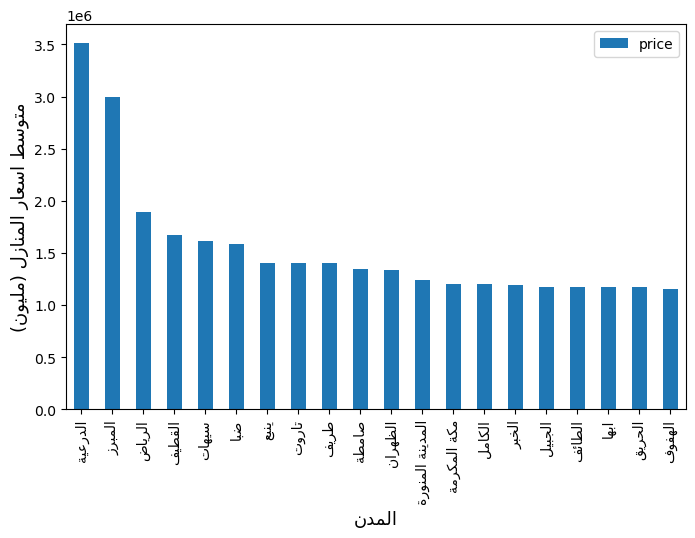

In [42]:
yticks = ([0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000])
plot_bar(groupBycities,xlabel=get_display(arabic_reshaper.reshape('المدن')), ylabel=get_display(arabic_reshaper.reshape("متوسط اسعار المنازل (مليون)")),
         Xaxis = cities_reshape ,oldXaxis = groupBycities.index.values,)

<h4>The top 20 house prices in Saudi Neighborhood</h4>

In [43]:
groupByneighborhood = pd.DataFrame(Houses_df.groupby(['neighborhood'],group_keys=False).price.mean().sort_values(ascending=False)[:20].reset_index())
groupByneighborhood

,neighborhood,price
0,حي المنصور,5.000000e+06
1,حي شرق الضباط,5.000000e+06
2,حي الشفق,5.000000e+06
3,حي المؤتمرات,4.869867e+06
4,حي الحرس الوطني,4.516667e+06
5,حي جامعة الملك سعود,4.050000e+06
6,حي الغدير,3.785741e+06
7,حي الملقا,3.665972e+06
8,حي صلاح الدين,3.658857e+06
9,حي التقوى,3.600000e+06


In [44]:
Neighborhood_reshape = reshape_language(groupByneighborhood.neighborhood.values)

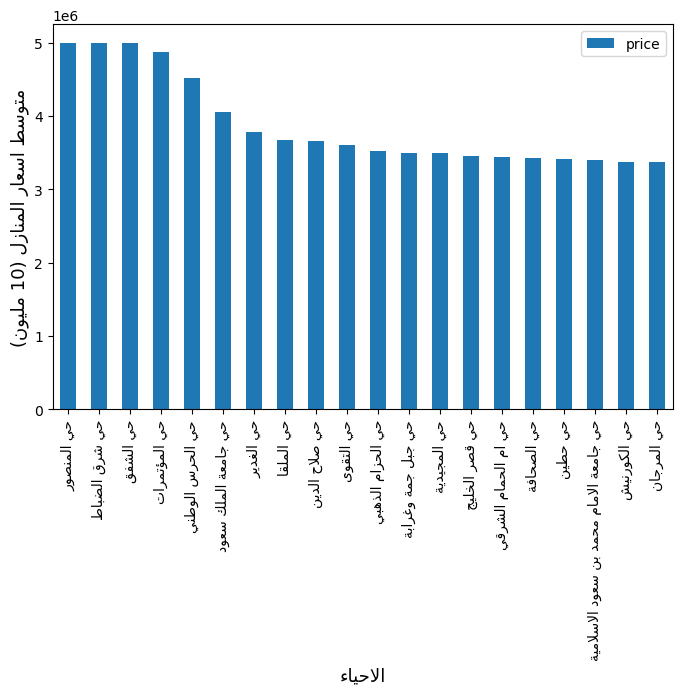

In [45]:

plot_bar(groupByneighborhood,xlabel=get_display(arabic_reshaper.reshape('الاحياء')), 
         ylabel=get_display(arabic_reshaper.reshape("متوسط اسعار المنازل (10 مليون)")),
         Xaxis = Neighborhood_reshape ,oldXaxis = groupByneighborhood.index.values,)

<h4>Houses price for each classification</h4>

In [46]:
groupByClassification = pd.DataFrame(Houses_df.groupby(['Classification'],group_keys=False).price.mean().sort_values(ascending=False).reset_index())
groupByClassification

,Classification,price
0,زراعي,2.456025e+06
1,سكني,1.475896e+06
2,تجاري سكني,1.423094e+06
3,تجاري,1.108345e+06


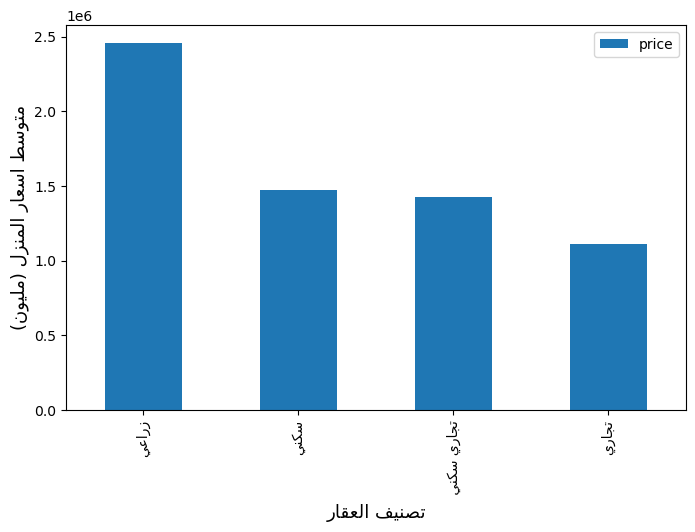

In [47]:
Classification_reshape = reshape_language(groupByClassification.Classification.values)
plot_bar(groupByClassification,xlabel=get_display(arabic_reshaper.reshape('تصنيف العقار')), ylabel=get_display(arabic_reshaper.reshape("متوسط اسعار المنزل (مليون)")),
         Xaxis = Classification_reshape ,oldXaxis = groupByClassification.index.values)

In [48]:
groupBycategory= pd.DataFrame(Houses_df.groupby(['category'],group_keys=False).price.mean().sort_values(ascending=False).reset_index())
groupBycategory.category = ['فلا','بيت','دور','شقة']
groupBycategory

,category,price
0,فلا,1.842316e+06
1,بيت,1.039542e+06
2,دور,9.444479e+05
3,شقة,6.923929e+05


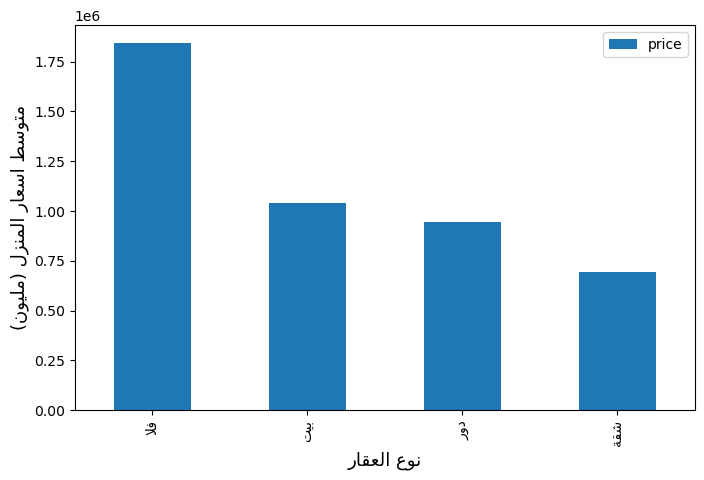

In [49]:
r =reshape_language(groupBycategory.category.values)
plot_bar(groupBycategory,xlabel=get_display(arabic_reshaper.reshape('نوع العقار')), ylabel=get_display(arabic_reshaper.reshape("متوسط اسعار المنزل (مليون)")),
         Xaxis =r, oldXaxis = groupBycategory.index.values)

* (الدرعية) have the highest mean price for houses which is approximately 3.5M after that came (المبرز) with 3M and (الرياض) with 1.8M. And, the range between (الدرعية) and (ضبا) is 2M which is a big difference between theses cities. 
* The mean of (حي المنصور) , (حي شرق الضباط) and (حي الشفق) prices equal 5M and this is highest price for houses. Then came (حي المؤتمرات) with 4.8M.when we see the prices in the chart we can requgnize that the prices are so close between each other.  
* The mean of (الزراعية) houses price is almost 2.5M and this is over than mean of (سكني) houses price by almost 1M which came after it. Then (تجاري سكني) houses with average approximately 1.4M and (تجارية) with 1.1M.
* Villas have the highest mean price compared to other real estate categories, as the average price of a villa is 1.8M riyals in the Kingdom of Saudi Arabia, and then the (house) came with an average price very close to the average floor with an average value of 1M riyals for the house and 9.4K for floor .in the Last Apartmient with average value about 700K.

<h4>The Relashen between price and the real estat age</h4>

In [106]:
Classification_reshape = ['ﻲﻨﻜﺳ', ' ﻲﻨﻜﺳ ﻱﺭﺎﺠﺗ' , 'ﻱﺭﺎﺠﺗ','ﻲﻋﺍﺭﺯ']

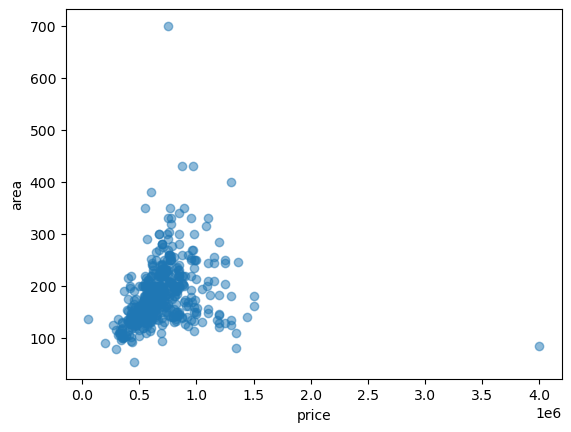

In [107]:
Houses_samples = Houses_df[Houses_df['category']== 6].sample(n=500, replace = False)
sns.regplot(data=Houses_samples, x="price", y="area",fit_reg=False,scatter_kws={'alpha': 0.5})
plt.show()

In [108]:
Houses_df[Houses_df.Classification.str.contains('تجاري سكني')]

,Unnamed: 0,id,category,bedroom,livingـroom,bathroom,ketchen,area,street_width,age,city,city_id,neighborhood,neighborhood_id,price,Classification,Classification_id,price_range_id,price_range
27,316,802829,6,3,1,2,1,132,30,10,الرياض,21,حي الحمراء,416,600000.0,تجاري سكني,2,2,"(400001.0, 600001.0]"
40,516,1124364,3,5,2,5,1,1450,30,3,جدة,66,حي الامواج,3432,5500000.0,تجاري سكني,2,27,"(5400001.0, 5600001.0]"
63,664,1304924,6,4,1,2,1,155,30,10,الرياض,21,حي الاندلس,396,850000.0,تجاري سكني,2,4,"(800001.0, 1000001.0]"
240,1570,2033571,6,5,1,4,1,210,20,10,الرياض,21,حي اليرموك,634,950000.0,تجاري سكني,2,4,"(800001.0, 1000001.0]"
301,1844,2181953,6,5,1,3,0,200,15,0,الدمام,18,حي الفيحاء,1270,560000.0,تجاري سكني,2,2,"(400001.0, 600001.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202953,436558,5200028,6,5,1,3,1,197,40,0,الرياض,21,حي غرناطة,704,1120000.0,تجاري سكني,2,5,"(1000001.0, 1200001.0]"
202959,436571,5200041,6,5,1,3,1,240,40,0,الرياض,21,حي غرناطة,704,1200000.0,تجاري سكني,2,5,"(1000001.0, 1200001.0]"
202976,436596,5200066,6,4,1,3,1,260,40,0,الرياض,21,حي القادسية,530,1000000.0,تجاري سكني,2,4,"(800001.0, 1000001.0]"
202992,436617,5200087,6,4,1,3,1,162,40,0,الرياض,21,حي المونسية,590,852000.0,تجاري سكني,2,4,"(800001.0, 1000001.0]"


/Users/youssef_al-lehyani/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


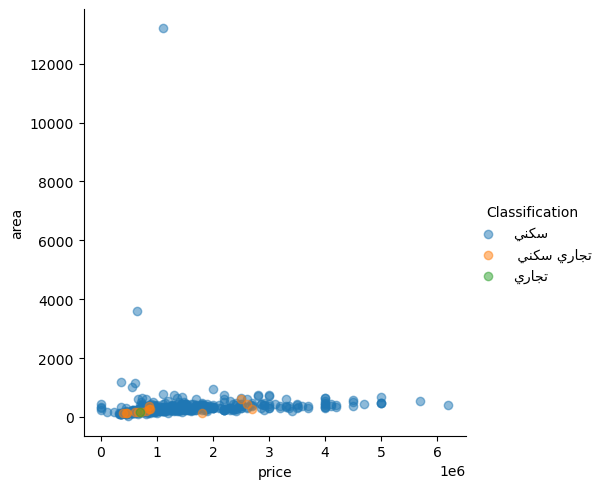

In [109]:
Houses_samples = Houses_df.sample(n=500, replace = False)
# Houses_df_area = Houses_samples[(Houses_samples['area']<10000)&(Houses_samples['price']<10000000)]
Grid_Classification = sns.FacetGrid(data = Houses_samples, hue = 'Classification', height=5)
Grid_Classification.map_dataframe(plt.scatter, 'price', 'area',alpha = 0.5)
Grid_Classification.add_legend(labels=Classification_reshape);

Most of houses area between 0 to 2000 that price range from 0 to 10M

/Users/youssef_al-lehyani/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 800x500 with 0 Axes>

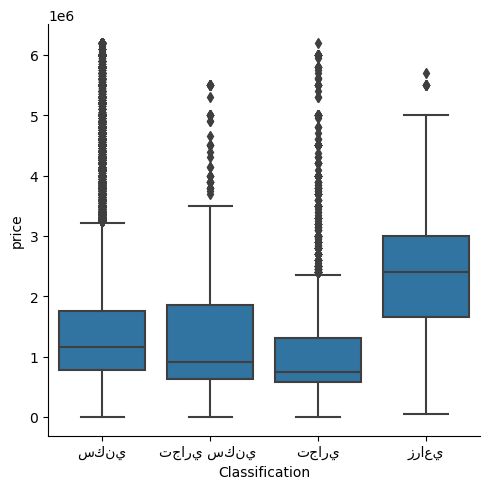

In [110]:
plt.figure(figsize=[8, 5])
g = sns.FacetGrid(data = Houses_df, height=5)
g.map(sns.boxplot, 'Classification', 'price');


/Users/youssef_al-lehyani/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


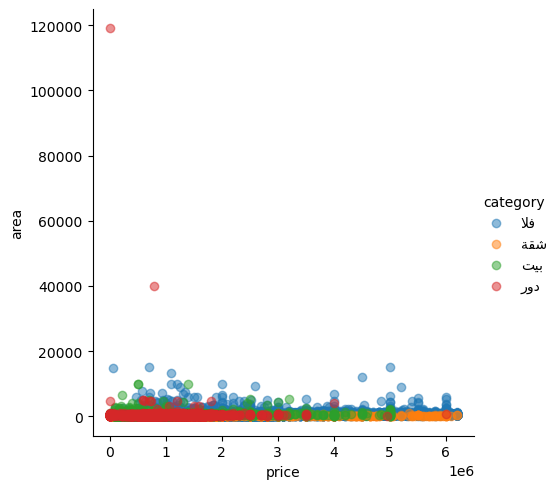

In [111]:
re =['ﻼﻓ', 'ﺔﻘﺷ', 'ﺖﻴﺑ', 'ﺭﻭﺩ']
Houses_samples = Houses_df.sample(n=500, replace = False)
# Houses_df_area = Houses_df[(Houses_df['area']<10000)&(Houses_df['price']<10000000)]
Grid_Classification = sns.FacetGrid(data = Houses_df, hue = 'category', height=5)
Grid_Classification.map_dataframe(plt.scatter, 'price', 'area',alpha = 0.5)
Grid_Classification.add_legend(labels=re);

### Analyzing lands price.

In [56]:
Land_df.describe()

,Unnamed: 0,id,category,area,street_width,city_id,neighborhood_id,price
count,134052.000000,1.340520e+05,134052.0,1.340520e+05,134052.000000,134052.000000,134052.000000,1.340520e+05
mean,195940.508914,4.707102e+06,2.0,1.152263e+04,23.195499,30.966192,1273.580596,9.730163e+06
std,127088.909884,4.965023e+05,0.0,3.388810e+05,13.855394,21.036375,1140.893764,1.215602e+08
min,0.000000,4.331000e+03,2.0,1.000000e+01,1.000000,1.000000,4.000000,8.690000e+02
25%,84875.750000,4.524494e+06,2.0,4.760000e+02,15.000000,21.000000,536.000000,7.000000e+05
50%,180346.000000,4.839082e+06,2.0,7.360000e+02,20.000000,21.000000,650.000000,1.649700e+06
75%,303368.750000,5.036962e+06,2.0,1.000000e+03,25.000000,41.000000,1638.000000,3.788000e+06
max,438534.000000,5.202081e+06,2.0,8.600000e+07,100.000000,97.000000,4436.000000,1.000000e+10


In [57]:
Land_df_s= remove_outliers(Land_df,['price'],0)

Working on column: price


In [58]:
Land_df_s.reset_index(inplace = True)

/Users/youssef_al-lehyani/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/youssef_al-lehyani/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/seaborn/axisgrid.py:181: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


<Figure size 800x500 with 0 Axes>

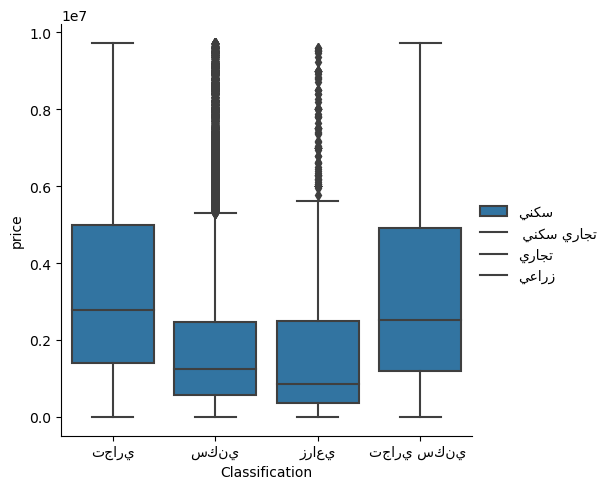

In [59]:
plt.figure(figsize=[8, 5])
g = sns.FacetGrid(data = Land_df_s, height=5)
g.map(sns.boxplot, 'Classification', 'price');
g.add_legend(labels=Classification_reshape);

In [60]:
Land_df_s.count()

index              120877
Unnamed: 0         120877
id                 120877
category           120877
area               120877
street_width       120877
city               120877
city_id            120877
neighborhood       120877
neighborhood_id    120877
Classification     120877
price              120877
dtype: int64

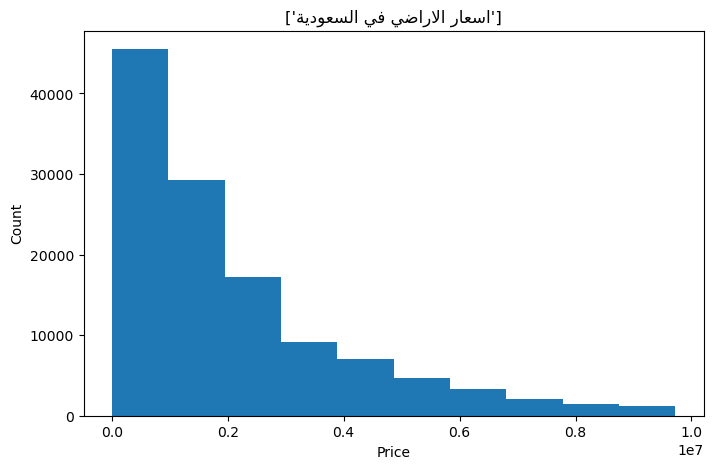

In [61]:
dd = ['اسعار الاراضي في السعودية']
land_titel = reshape_language(dd)
bins = np.arange(Land_df['price'].min(), 5000000, 100000)
plt.figure(figsize=[8, 5])
plt.hist(data = Land_df_s, x = 'price')
plt.xlabel('Price')
# plt.xticks([100000,1000000,2000000, 3000000, 4000000, 5000000,6000000,7000000,8000000,9000000],
#            ['100K','1M',"2M",'3M','4M','5M','6M','7M','8M','9M'])
plt.ylabel('Count');
plt.title(land_titel)
plt.show()

In [62]:
Land_groupBycities = pd.DataFrame(Land_df_s.groupby(['city'],group_keys=False).price.mean().sort_values(ascending=False)[:20].reset_index())
Land_groupBycities

,city,price
0,املج,2.964336e+06
1,الدرعية,2.952241e+06
2,الرياض,2.676259e+06
3,الظهران,2.475555e+06
4,القطيف,2.137370e+06
5,الدمام,2.017021e+06
6,مكة المكرمة,1.895281e+06
7,جدة,1.797678e+06
8,عنك,1.763100e+06
9,تاروت,1.712486e+06


<h4>The top 20 Land prices in Saudi cities</h4>

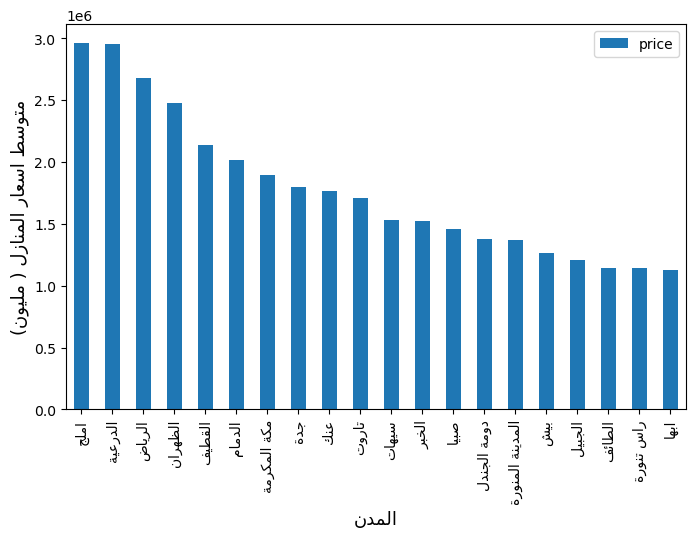

In [63]:
yticks = ([0,4000000,8000000,12000000,6000000,8000000,10000000,12000000,4000000,4500000])
cities_reshapeL = reshape_language(Land_groupBycities.city.values)
plot_bar(Land_groupBycities,xlabel=get_display(arabic_reshaper.reshape('المدن')), ylabel=get_display(arabic_reshaper.reshape("متوسط اسعار المنازل ( مليون)")),
         Xaxis = cities_reshapeL ,oldXaxis = Land_groupBycities.index.values,)

In [64]:
groupByneighborhoodLand = pd.DataFrame(Land_df_s.groupby(['neighborhood'],group_keys=False).price.mean().sort_values(ascending=False)[:20].reset_index())
groupByneighborhoodLand

,neighborhood,price
0,حي الهنداوية,9.000000e+06
1,حي المدوية,8.491660e+06
2,حي البغدادية الشرقية,8.325000e+06
3,حي الحسيني,7.600000e+06
4,حي ضمك,7.320000e+06
5,حي الجبل,7.093350e+06
6,حي الطندباوي,7.000000e+06
7,حي النفود,6.727500e+06
8,حي المنزم,6.475000e+06
9,حي الجميزة,6.030000e+06


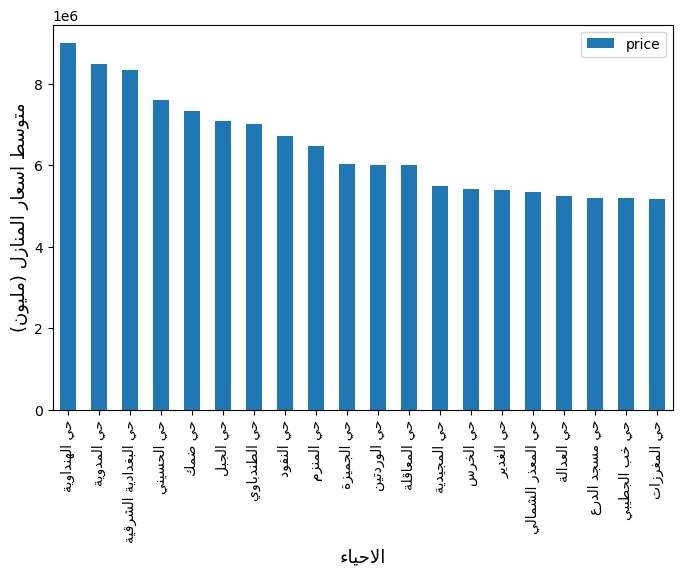

In [65]:
cities_reshapeL = reshape_language(groupByneighborhoodLand.neighborhood.values)
plot_bar(groupByneighborhoodLand,xlabel=get_display(arabic_reshaper.reshape('الاحياء')), ylabel=get_display(arabic_reshaper.reshape("متوسط اسعار المنازل (مليون)")),
         Xaxis = cities_reshapeL ,oldXaxis = Land_groupBycities.index.values,)

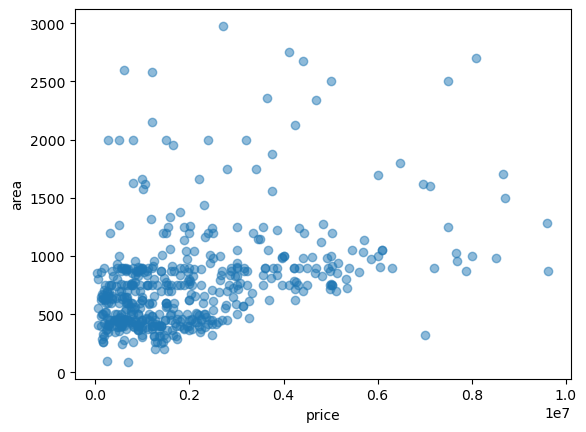

In [66]:
Land_df_sample = Land_df_s[Land_df_s['area']<3000]
Lands_samples = Land_df_sample.sample(n=500, replace = False)
sns.regplot(data=Lands_samples, x="price", y="area",fit_reg=False,scatter_kws={'alpha': 0.5})
plt.show()

sdf

# Data science

In [67]:
Houses_df.head()

,Unnamed: 0,id,category,bedroom,livingـroom,bathroom,ketchen,area,street_width,age,city,city_id,neighborhood,neighborhood_id,price,Classification
1,11,24578,3,5,1,3,1,400,30,0,مكة المكرمة,94,حي الملك فهد,3766,1650000.0,سكني
2,24,69806,6,5,1,3,1,210,30,0,الدمام,18,حي النور,1306,470000.0,سكني
3,41,93178,6,3,1,4,1,240,5,0,مدينة الملك عبدالله الاقتصادية,93,حي البيلسان,3670,2500000.0,سكني
4,53,122930,3,5,4,5,1,203,12,18,الطائف,26,حي الخالدية,3320,1200000.0,سكني
5,55,131908,9,5,3,4,1,290,5,30,مكة المكرمة,94,حي المعابدة,3764,1500000.0,سكني


In [68]:
Land_df_s.head()

,index,Unnamed: 0,id,category,area,street_width,city,city_id,neighborhood,neighborhood_id,Classification,price
0,0,0,4331,2,816,60,الرياض,21,حي الدار البيضاء,424,تجاري,1958400.0
1,2,2,5498,2,23022,15,محايل,92,حي الروضة,4100,سكني,8057700.0
2,3,4,8847,2,870,15,الخبر,12,حي الثقبة,1060,سكني,3000000.0
3,4,5,8968,2,875,30,الرياض,21,حي الدار البيضاء,424,سكني,1050000.0
4,5,8,21280,2,750,25,المدينة المنورة,41,حي طيبة,3068,تجاري,2775000.0


In [69]:
Houses_df['Classification_id'] = -1


Class_0 = ((Houses_df.Classification.str.contains('سكني'))|(Houses_df.Classification.str.contains('سكنية')))
Class_1 = ((Houses_df.Classification.str.contains('تجاري'))|(Houses_df.Classification.str.contains('تجارية')))
Class_2 = ((Houses_df.Classification.str.contains('زراعي')) | (Houses_df.Classification.str.contains('زراعية')))

Houses_df.loc[(~Class_0)& (Class_1) &(~Class_2), 'Classification_id']=1
Houses_df.loc[((Class_0)& (~Class_1) &(~Class_2)|(~Class_0)& (~Class_1) &(~Class_2)), 'Classification_id']=0
Houses_df.loc[(~Class_0)& (~Class_1) &(Class_2), 'Classification_id']=3
Houses_df.loc[(Class_0)& (Class_1) &(~Class_2), 'Classification_id']=2

In [70]:
Houses_df.groupby(['Classification_id','Classification']).Classification_id.count()

Classification_id  Classification
0                  سكني              194102
1                  تجاري               4360
2                  تجاري سكني           567
3                  زراعي                160
Name: Classification_id, dtype: int64

In [71]:
Land_df_s['Classification_id'] = -1


Class_0 = ((Land_df_s.Classification.str.contains('سكني')))
Class_1 = ((Land_df_s.Classification.str.contains('تجاري')))
Class_2 = ((Land_df_s.Classification.str.contains('زراعي')))

Land_df_s.loc[(~Class_0)& (Class_1) &(~Class_2), 'Classification_id']=1
Land_df_s.loc[((Class_0)& (~Class_1) &(~Class_2)|(~Class_0)& (~Class_1) &(~Class_2)), 'Classification_id']=0
Land_df_s.loc[(~Class_0)& (~Class_1) &(Class_2), 'Classification_id']=3
Land_df_s.loc[(Class_0)& (Class_1) &(~Class_2), 'Classification_id']=2

/var/folders/xz/g8xpv2m149q45f7_gzw2vmkm0000gn/T/ipykernel_74764/3040306935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Land_df_s['Classification_id'] = -1


In [72]:
Land_df_s.groupby(['Classification_id','Classification']).Classification_id.count()

Classification_id  Classification
0                  سكني              102208
1                  تجاري              11952
2                  تجاري سكني          5511
3                  زراعي               1206
Name: Classification_id, dtype: int64

In [73]:
Houses_df['price_range_id'] = 0 
Land_df_s['price_range_id'] =0

/var/folders/xz/g8xpv2m149q45f7_gzw2vmkm0000gn/T/ipykernel_74764/2545509681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Land_df_s['price_range_id'] =0


In [74]:
bins = np.arange(Land_df_s['price'].min(), Land_df_s['price'].max(), 500000)
Land_df_s['price_range']=pd.cut(Land_df_s['price'], bins=bins)
labels_L=Land_df_s['price_range'].value_counts().count()
list_number = list(range(0, labels_L))
Land_df_s['price_range_id']=pd.cut(Land_df_s['price'], bins=bins, labels=list_number)

/var/folders/xz/g8xpv2m149q45f7_gzw2vmkm0000gn/T/ipykernel_74764/386166004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Land_df_s['price_range']=pd.cut(Land_df_s['price'], bins=bins)
/var/folders/xz/g8xpv2m149q45f7_gzw2vmkm0000gn/T/ipykernel_74764/386166004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Land_df_s['price_range_id']=pd.cut(Land_df_s['price'], bins=bins, labels=list_number)


In [75]:
Land_df_s.head()

,index,Unnamed: 0,id,category,area,street_width,city,city_id,neighborhood,neighborhood_id,Classification,price,Classification_id,price_range_id,price_range
0,0,0,4331,2,816,60,الرياض,21,حي الدار البيضاء,424,تجاري,1958400.0,1,3,"(1500869.0, 2000869.0]"
1,2,2,5498,2,23022,15,محايل,92,حي الروضة,4100,سكني,8057700.0,0,16,"(8000869.0, 8500869.0]"
2,3,4,8847,2,870,15,الخبر,12,حي الثقبة,1060,سكني,3000000.0,0,5,"(2500869.0, 3000869.0]"
3,4,5,8968,2,875,30,الرياض,21,حي الدار البيضاء,424,سكني,1050000.0,0,2,"(1000869.0, 1500869.0]"
4,5,8,21280,2,750,25,المدينة المنورة,41,حي طيبة,3068,تجاري,2775000.0,1,5,"(2500869.0, 3000869.0]"


In [76]:
bins = np.arange(Houses_df['price'].min(), Houses_df['price'].max(), 200000)
Houses_df['price_range']=pd.cut(Houses_df['price'], bins=bins)
labels_H=Houses_df['price_range'].value_counts().count()
list_number = list(range(0, labels_H))
Houses_df['price_range_id']=pd.cut(Houses_df['price'], bins=bins, labels=list_number)

In [77]:
Houses_df.head()

,Unnamed: 0,id,category,bedroom,livingـroom,bathroom,ketchen,area,street_width,age,city,city_id,neighborhood,neighborhood_id,price,Classification,Classification_id,price_range_id,price_range
1,11,24578,3,5,1,3,1,400,30,0,مكة المكرمة,94,حي الملك فهد,3766,1650000.0,سكني,0,8,"(1600001.0, 1800001.0]"
2,24,69806,6,5,1,3,1,210,30,0,الدمام,18,حي النور,1306,470000.0,سكني,0,2,"(400001.0, 600001.0]"
3,41,93178,6,3,1,4,1,240,5,0,مدينة الملك عبدالله الاقتصادية,93,حي البيلسان,3670,2500000.0,سكني,0,12,"(2400001.0, 2600001.0]"
4,53,122930,3,5,4,5,1,203,12,18,الطائف,26,حي الخالدية,3320,1200000.0,سكني,0,5,"(1000001.0, 1200001.0]"
5,55,131908,9,5,3,4,1,290,5,30,مكة المكرمة,94,حي المعابدة,3764,1500000.0,سكني,0,7,"(1400001.0, 1600001.0]"


In [78]:
Land_df_s.dropna(inplace = True)

/var/folders/xz/g8xpv2m149q45f7_gzw2vmkm0000gn/T/ipykernel_74764/2818989471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Land_df_s.dropna(inplace = True)


In [79]:
Houses_df.dropna(inplace = True)

In [80]:
Land_df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120654 entries, 0 to 120876
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   index              120654 non-null  int64   
 1   Unnamed: 0         120654 non-null  int64   
 2   id                 120654 non-null  int64   
 3   category           120654 non-null  int64   
 4   area               120654 non-null  int64   
 5   street_width       120654 non-null  int64   
 6   city               120654 non-null  object  
 7   city_id            120654 non-null  int64   
 8   neighborhood       120654 non-null  object  
 9   neighborhood_id    120654 non-null  int64   
 10  Classification     120654 non-null  object  
 11  price              120654 non-null  float64 
 12  Classification_id  120654 non-null  int64   
 13  price_range_id     120654 non-null  category
 14  price_range        120654 non-null  category
dtypes: category(2), float64(1), int64(

In [81]:
Houses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199120 entries, 1 to 203773
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Unnamed: 0         199120 non-null  int64   
 1   id                 199120 non-null  int64   
 2   category           199120 non-null  int64   
 3   bedroom            199120 non-null  int64   
 4   livingـroom        199120 non-null  int64   
 5   bathroom           199120 non-null  int64   
 6   ketchen            199120 non-null  int64   
 7   area               199120 non-null  int64   
 8   street_width       199120 non-null  int64   
 9   age                199120 non-null  int64   
 10  city               199120 non-null  object  
 11  city_id            199120 non-null  int64   
 12  neighborhood       199120 non-null  object  
 13  neighborhood_id    199120 non-null  int64   
 14  price              199120 non-null  float64 
 15  Classification     199120 non-null

In [82]:
Land_df_s[['price_range_id','price_range']].value_counts()

price_range_id  price_range           
0               (869.0, 500869.0]         23934
1               (500869.0, 1000869.0]     23887
2               (1000869.0, 1500869.0]    15951
3               (1500869.0, 2000869.0]    13257
4               (2000869.0, 2500869.0]     9757
5               (2500869.0, 3000869.0]     6956
6               (3000869.0, 3500869.0]     4509
7               (3500869.0, 4000869.0]     4290
8               (4000869.0, 4500869.0]     3889
9               (4500869.0, 5000869.0]     3190
10              (5000869.0, 5500869.0]     2419
11              (5500869.0, 6000869.0]     1823
12              (6000869.0, 6500869.0]     1665
13              (6500869.0, 7000869.0]     1247
14              (7000869.0, 7500869.0]     1160
17              (8500869.0, 9000869.0]      804
15              (7500869.0, 8000869.0]      798
16              (8000869.0, 8500869.0]      612
18              (9000869.0, 9500869.0]      506
dtype: int64

In [83]:
Land_data = Land_df_s[['area','street_width','city_id','neighborhood_id','Classification_id','price_range_id']]
House_data = Houses_df[['category','bedroom','livingـroom','bathroom','ketchen','area','street_width','city_id','neighborhood_id','Classification_id','price_range_id']]

In [84]:
Land_data

,area,street_width,city_id,neighborhood_id,Classification_id,price_range_id
0,816,60,21,424,1,3
1,23022,15,92,4100,0,16
2,870,15,12,1060,0,5
3,875,30,21,424,0,2
4,750,25,41,3068,1,5
...,...,...,...,...,...,...
120872,3351,40,18,1246,0,15
120873,900,25,66,3490,0,2
120874,398,31,21,410,0,1
120875,500,15,21,498,0,2


## Machine Learning

In [90]:
from sklearn import tree
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics  import f1_score,accuracy_score

In [91]:
y = Land_data.price_range_id
X_t=Land_data.drop(['price_range_id'], axis=1)
X = X_t


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)


model_Land = DecisionTreeClassifier(splitter='best')
model_Land.fit(X_train,y_train)
# y_pred = model_r.predict(Land_Test_data)
pred=model_Land.predict(X_test)
 
# for classification we use accuracy and F1 score
print(accuracy_score(y_test,pred))
# print(f1_score(y_test,pred))

validation = round(model_Land.score(X_train,y_train) * 100, 2)
print("Validation model: ",validation)

# output = pd.DataFrame({'PassengerId': Test_data.PassengerId, 'Survived': y_pred})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

0.6785092687239274
Validation model:  86.95


In [92]:
y = Land_data.price_range_id
X_t=Land_data.drop(['price_range_id'], axis=1)
X = X_t


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)


model_Land =  tree.DecisionTreeClassifier(max_depth=50)
model_Land.fit(X_train,y_train)
# y_pred = model_r.predict(Land_Test_data)
pred=model_Land.predict(X_test)
 
# for classification we use accuracy and F1 score
print(accuracy_score(y_test,pred))
# print(f1_score(y_test,pred))

validation = round(model_Land.score(X_train,y_train) * 100, 2)
print("Validation model: ",validation)

# output = pd.DataFrame({'PassengerId': Test_data.PassengerId, 'Survived': y_pred})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

0.6785921485205957
Validation model:  86.95


In [93]:
le = list()
correct = 0
notcorrect = 0 
count = 0
for i in pred:
    
    if(pred[count] == i):
        correct +=1 
    else:
        notcorrect += 1
    count +=1     
print(correct)
print(notcorrect)

36197
0


# Houses

In [94]:
y = House_data.price_range_id
X_H= House_data.drop(['price_range_id'], axis=1)
X = X_H


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)


model_House = DecisionTreeClassifier(splitter='best')
model_House.fit(X_train,y_train)
# y_pred = model_r.predict(Land_Test_data)
pred=model_House.predict(X_test)
 
# for classification we use accuracy and F1 score
print(accuracy_score(y_test,pred))
# print(f1_score(y_test,pred))

validation = round(model_House.score(X_train,y_train) * 100, 2)
print("Validation model: ",validation)

# output = pd.DataFrame({'PassengerId': Test_data.PassengerId, 'Survived': y_pred})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

0.5312541850810232
Validation model:  89.58


In [95]:
le = list()
correct = 0
notcorrect = 0 
count = 0
for i in pred:
    
    if(pred[count] == i):
        correct +=1 
    else:
        notcorrect += 1
    count +=1     
print(correct)
print(notcorrect)

59736
0


### Price Range

In [96]:
rang_house_price=pd.read_csv('price_Ranges_H.csv')
rang_land_price=pd.read_csv('price_Ranges_L.csv')

In [97]:
rang_land_price

,price_range_id,price_range_from,price_range_to
0,0,1041,501041
1,1,501041,1001041
2,2,1001041,1501041
3,3,1501041,2001041
4,4,2001041,2501041
5,5,2501041,3001041
6,6,3001041,3501041
7,7,3501041,4001041
8,8,4001041,4501041
9,9,4501041,5001041


In [98]:
Cities_id=pd.read_csv('citiesdf.csv')
Neighborhoods_id=pd.read_csv('neighborhoodsdf.csv')

In [99]:
Neighborhoods_id['neighborhood']= Neighborhoods_id.neighborhood.astype(str)
Cities_id['city']= Cities_id.city.astype(str)

In [100]:
e = Cities_id.loc[Cities_id['city'] == "الرياض"].city_id 

In [101]:
Cities_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  97 non-null     int64 
 1   city        97 non-null     object
 2   city_id     97 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


## Try it 

In [102]:
def Find_cityid(Name):
    return Cities_id[Cities_id.city.str.contains(Name)].city_id.values[0]
def Find_neighborhoodid(Name):
    return Neighborhoods_id[Neighborhoods_id.neighborhood.str.contains(Name)].neighborhood_id.values[0]

def Find_Classification(Name):
    if(Name == 'تجاري'):
        return 1
    if(Name == 'سكني'):
        return 0
    if(Name == 'تجاري سكني'):
        return 2
    if(Name == "زراعي"):
        return 3
    else: 
        return None
def Find_house(Name):
    if(Name=='فلا'):
        return 3
    if(Name == 'شقة'):
        return 6
    if(Name == 'بيت'):
        return 9
    if(Name == 'دور'):
        return 22
    else:
        return None

In [103]:
def Give_price_Land(price_range_id):
    start = rang_land_price[rang_land_price['price_range_id'] == price_range_id ].price_range_from.values[0]
    end = rang_land_price[rang_land_price['price_range_id'] == price_range_id ].price_range_to.values[0]
    print('The estimated value between ' + "{:,}".format(start) + " SAR and "+ "{:,}".format(end)+" SAR ")
    
def Give_price_House(price_range_id):
    start = rang_house_price[rang_house_price['price_range_id'] == price_range_id ].price_range_from.values[0]
    end = rang_house_price[rang_house_price['price_range_id'] == price_range_id ].price_range_to.values[0]
    print('The estimated value between ' + "{:,}".format(start) + " SAR and "+ "{:,}".format(end)+" SAR ")

<h3>Land model</h3>

In [104]:
print('The  estimated value of Land \n ')
print('Enter the area size: ')
area = int(input())
print('Enter the street width: ')
street_width = int(input())
print('Enter the area city_id: ')
city = input()
city_id= Find_cityid(city)
print('Enter the street neighborhood: ')
neighborhood = input()
neighborhood_id= Find_neighborhoodid(neighborhood)
print('Eiter the Classification: ("تجاري" ، "سكني" ، "تجاري سكني" ، "زراعي"): ')
Classification = input()
Classification_id = Find_Classification(Classification)
print('\n \n ')
Give_price_Land(model_Land.predict([[area,street_width,city_id,neighborhood_id,Classification_id]])[0])

The  estimated value of Land 
 
Enter the area size: 
700
Enter the street width: 
20
Enter the area city_id: 
مكة
Enter the street neighborhood: 
الشوقية
Eiter the Classification: ("تجاري" ، "سكني" ، "تجاري سكني" ، "زراعي"): 
سكني

 
 
The estimated value between 2,501,041 SAR and 3,001,041 SAR 


/Users/youssef_al-lehyani/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<h3> House model </h3>

In [105]:
print('The  estimated value of Houses \n ')
print('Enter the area size: ')
area = int(input())
print('Enter the street width: ')
street_width = int(input())
print('Enter the area city_id: ')
city = input()
city_id= Find_cityid(city)
print('Enter the street neighborhood: ')
neighborhood = input()
neighborhood_id= Find_neighborhoodid(neighborhood)
print('Enter the category of house("بيت"،"فلا"،"دور"،"شقة"): ')
category = input()
category_id = Find_house(category)
print('Enter the number of bedroom: ')
bedroom = int(input())
print('Enter the number of living room: ')
living_room = int(input())
print('Enter the number of bathrooms: ')
bathroom = int(input())
print('Enter the number of ketchen: ')
ketchen = int(input())

print('Eter the Classification: ("تجاري" ، "سكني" ، "تجاري سكني" ، "زراعي"): ')
Classification = input()
Classification_id = Find_Classification(Classification)
print('\n \n ')
Give_price_House(model_House.predict([[category_id,bedroom,living_room,bathroom,ketchen,area,street_width,city_id,neighborhood_id,Classification_id]])[0])

The  estimated value of Houses 
 
Enter the area size: 
250
Enter the street width: 
15
Enter the area city_id: 
مكة
Enter the street neighborhood: 
الشوقية
Enter the category of house("بيت"،"فلا"،"دور"،"شقة"): 
دور
Enter the number of bedroom: 
6
Enter the number of living room: 
2
Enter the number of bathrooms: 
4
Enter the number of ketchen: 
2
Eter the Classification: ("تجاري" ، "سكني" ، "تجاري سكني" ، "زراعي"): 
سكني

 
 
The estimated value between 800,002 SAR and 1,000,002 SAR 


/Users/youssef_al-lehyani/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
